In [135]:
import sys
import os

cur_dir = os.getcwd()
dataset_path = os.path.join(cur_dir, "../Dataset")
script_path = os.path.join(cur_dir, "../Scripts")
print(script_path)
sys.path.append(dataset_path)
sys.path.append(script_path)

d:\УЧЕБА\Remote monitoring\Scripts\../Scripts


## Импортируем нужные скрипты


In [136]:
from importlib import reload
import ECGsignal as ecg

In [137]:
reload(ecg)

ecg.init()

In [ ]:
test_ecg = ecg.signal(2)
ecg.plot_signal(2)

In [139]:
test_ecg = ecg.signal(number_labels={"SR" : 3, "VA" : 1, "AF" : 1}) #Количество примеров каждого класса.
#test_ecg = ecg.signal(2)

Text(0.5, 1.0, 'SR')

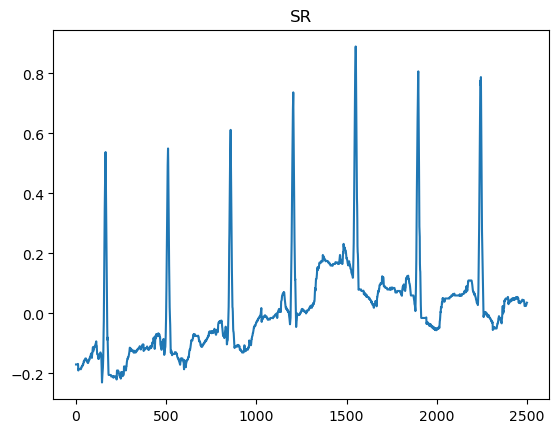

In [140]:
import matplotlib.pyplot as plt
plt.plot(test_ecg["data"][0][0])
plt.title(test_ecg["label"][0])

# Первое число - номер строчки, второе число - номер отведения

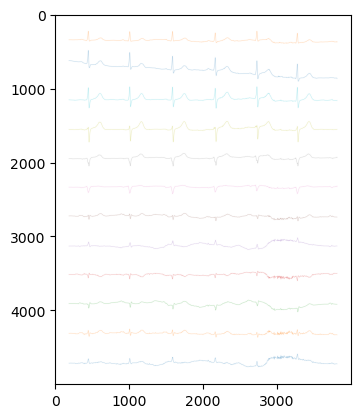

In [141]:
S = ecg.images({"SR" : 2, "VA" : 1, "AF" : 1})
plt.imshow(S["data"][0])

In [142]:
import VECG as vecg

reload(vecg) #Это для отображения изменений в файле без прерывания ядра

vecg.init(filtering=True, canc_showing=True, plot3D=False)

In [143]:
df_ecg = vecg.make_vecg_df(test_ecg, 0, 1)
#print(XY.dtype)

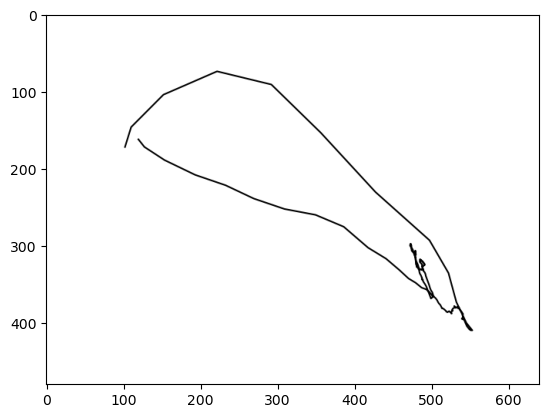

In [148]:
plt.imshow(df_ecg["XY"][0], cmap="gray")

In [149]:
M = ecg.images(2)